In [15]:
from helper_functions import extract_pdf_text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seed=25 #for random state / reproducibility

In [ ]:
df = pd.read_csv("ai_ml_papers.csv")
df.head()

In [5]:
df.describe()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
count,266252.0000,266148,266252,266252,154062,26772,34690,4066,266252,264663,266252,266252,266252,266252
unique,266252.0000,111092,246297,266081,105606,24614,34623,3998,18333,9,266163,265853,4321,241999
top,704.0047,EPTCS,Marcus Hutter,Discussion: Latent variable graphical model se...,10 pages,NeurIPS 2020,10.1145/1122445.1122456,SWAT4LS 2010,cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,"Discussion of ""Latent variable graphical mod...","[{'version': 'v1', 'created': 'Wed, 27 Jun 201...",2007-05-23,"[['Hutter', 'Marcus', '']]"
freq,1.0000,376,41,4,578,29,6,15,20413,160918,4,102,1038,41


There are a total of 266,252 papers, filtered to ML and AI related papers. There is no missing data for critical entries such as ids, authors, title and abstracts.

Let us sample the full-text pdf from some papers and proceed with EDA.

In [10]:
n_sample = 10

df_sample = df.sample(n=n_sample, random_state=seed)
#extract and append full-text
df_sample['full_text'] = df_sample['id'].apply(extract_pdf_text)

print(df_sample[['id','full_text']].head(5))

                id                                          full_text
91709   2101.10007  Adaptive Scheduling for Machine Learning Tasks...
89614   2012.12109  Enhance Convolutional Neural Networks with Noi...
108316  2107.11481  Similarity Based Label Smoothing For Dialogue ...
36393   1811.00739  An Empirical Exploration of Curriculum Learnin...
131454  2204.02389  OBJECTFOLDER 2.0: A Multisensory Object Datase...


In [29]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print("stop words")
print(stop_words)



stop words
{"hadn't", 'between', 'all', 'them', 'he', 'and', 'into', "haven't", 'yourselves', 'by', "aren't", 'didn', 'on', 'mightn', "shouldn't", 'hadn', 'yours', 'or', 'this', 'd', 'weren', 'where', 'having', 'ain', 'my', 'her', 'a', "couldn't", "wouldn't", 'our', 'for', "doesn't", 'mustn', 'because', 'but', "mustn't", 'haven', 'aren', 'both', 'when', 'does', 'themselves', "won't", 'how', 'being', "you've", 'very', 'there', "you'd", "hasn't", 'so', 'out', 's', 'they', 'while', 'then', 'whom', "isn't", 'had', 'before', 'yourself', 'any', 'those', 'was', 'o', 'won', 'through', 'which', 'him', 'herself', 'against', 'same', 'nor', 'these', 'about', 'will', 'isn', 'i', 'himself', 'at', "should've", 'did', 'an', 'after', "wasn't", 'hers', 'theirs', 'itself', "she's", "shan't", 'have', 'just', 'than', 'has', 'it', 'ma', 'is', 'during', 'ourselves', 'll', 'if', 'of', 'further', 'under', 'no', 'up', 'shouldn', 'with', 'she', "weren't", 'from', 'here', 'were', 'wouldn', "that'll", "don't", 'wa

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ekabu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekabu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


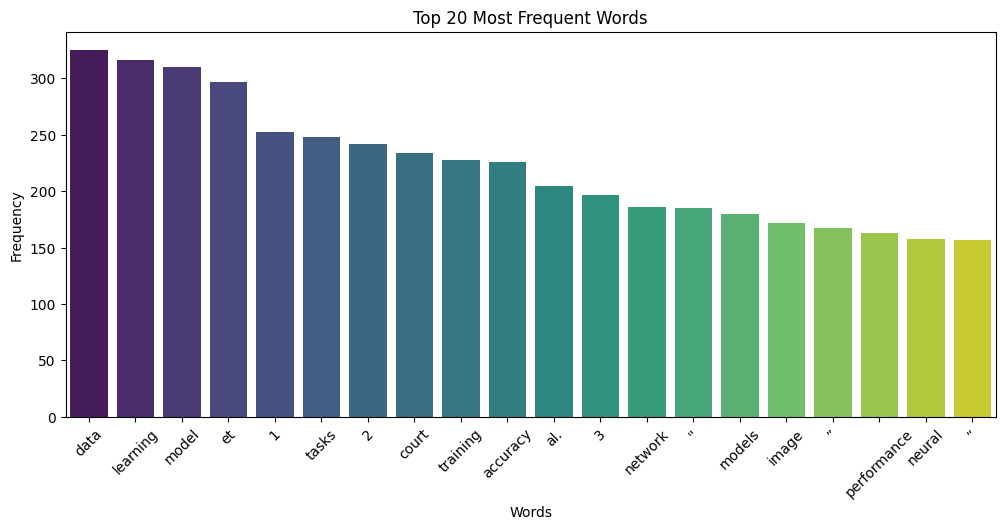

In [30]:


df_sample['tokens'] = df_sample['full_text'].str.lower() #lower case

nltk.download('punkt')
df_sample['tokens'] = df_sample['tokens'].apply(word_tokenize) #tokenize

df_sample['tokens'] = df_sample['tokens'].apply(lambda words: [word for word in words if word not in stop_words]) #remove stop words

df_sample['tokens'] = df_sample['tokens'].apply(lambda words: [word for word in words if word not in string.punctuation]) #remove punctuations


#Flatten the token lists into a single list of words
all_words = sum(df_sample['tokens'].dropna(), [])

# Count word frequencies
word_counts = Counter(all_words)
top_words = word_counts.most_common(20)

# Unpack words and counts for plotting
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words")
plt.show()
    


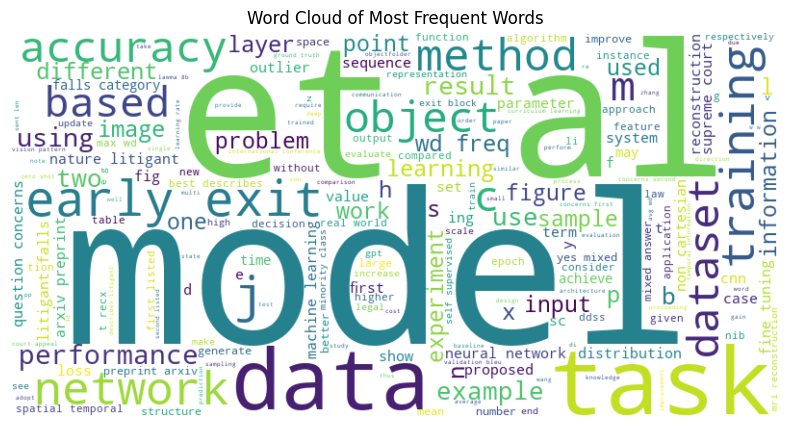

In [31]:
from wordcloud import WordCloud

# Generate a word cloud from the word list
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words")
plt.show()